In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv(r"C:\Users\johnk\Downloads\Wholesale_Data.csv")
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [24]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [25]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


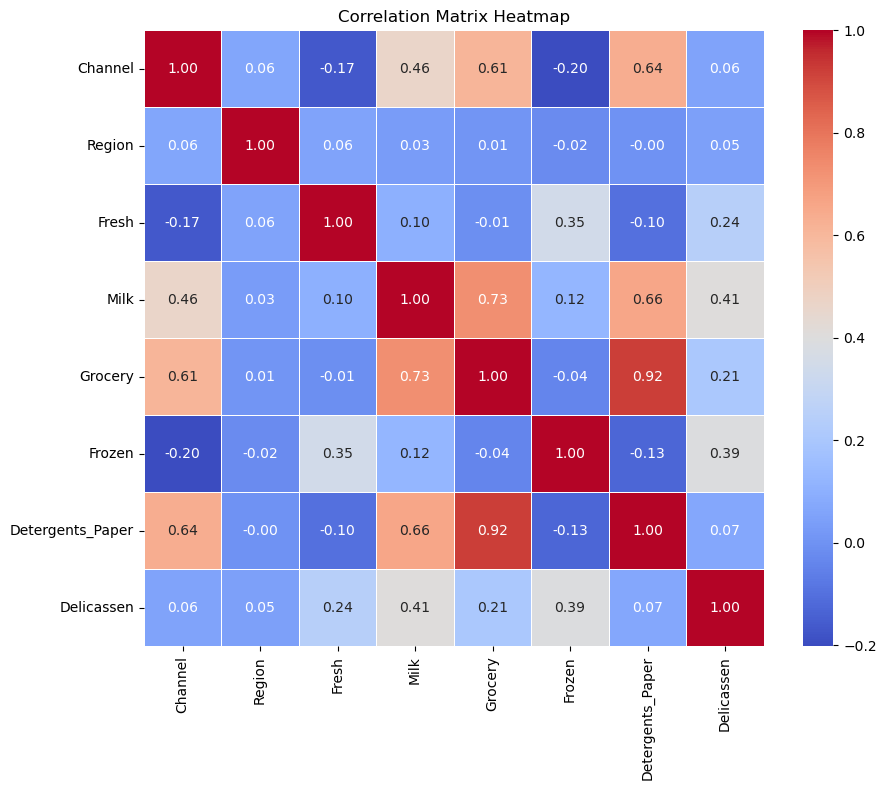

In [27]:
# Compute correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [28]:
# Store the Region and Channel columns separately
region_channel = df[['Region', 'Channel']]



In [29]:
# dropping the columns channel and region because thier are descrete values may influnce negatively the clustering.

df.drop(columns=['Channel','Region'],inplace=True)

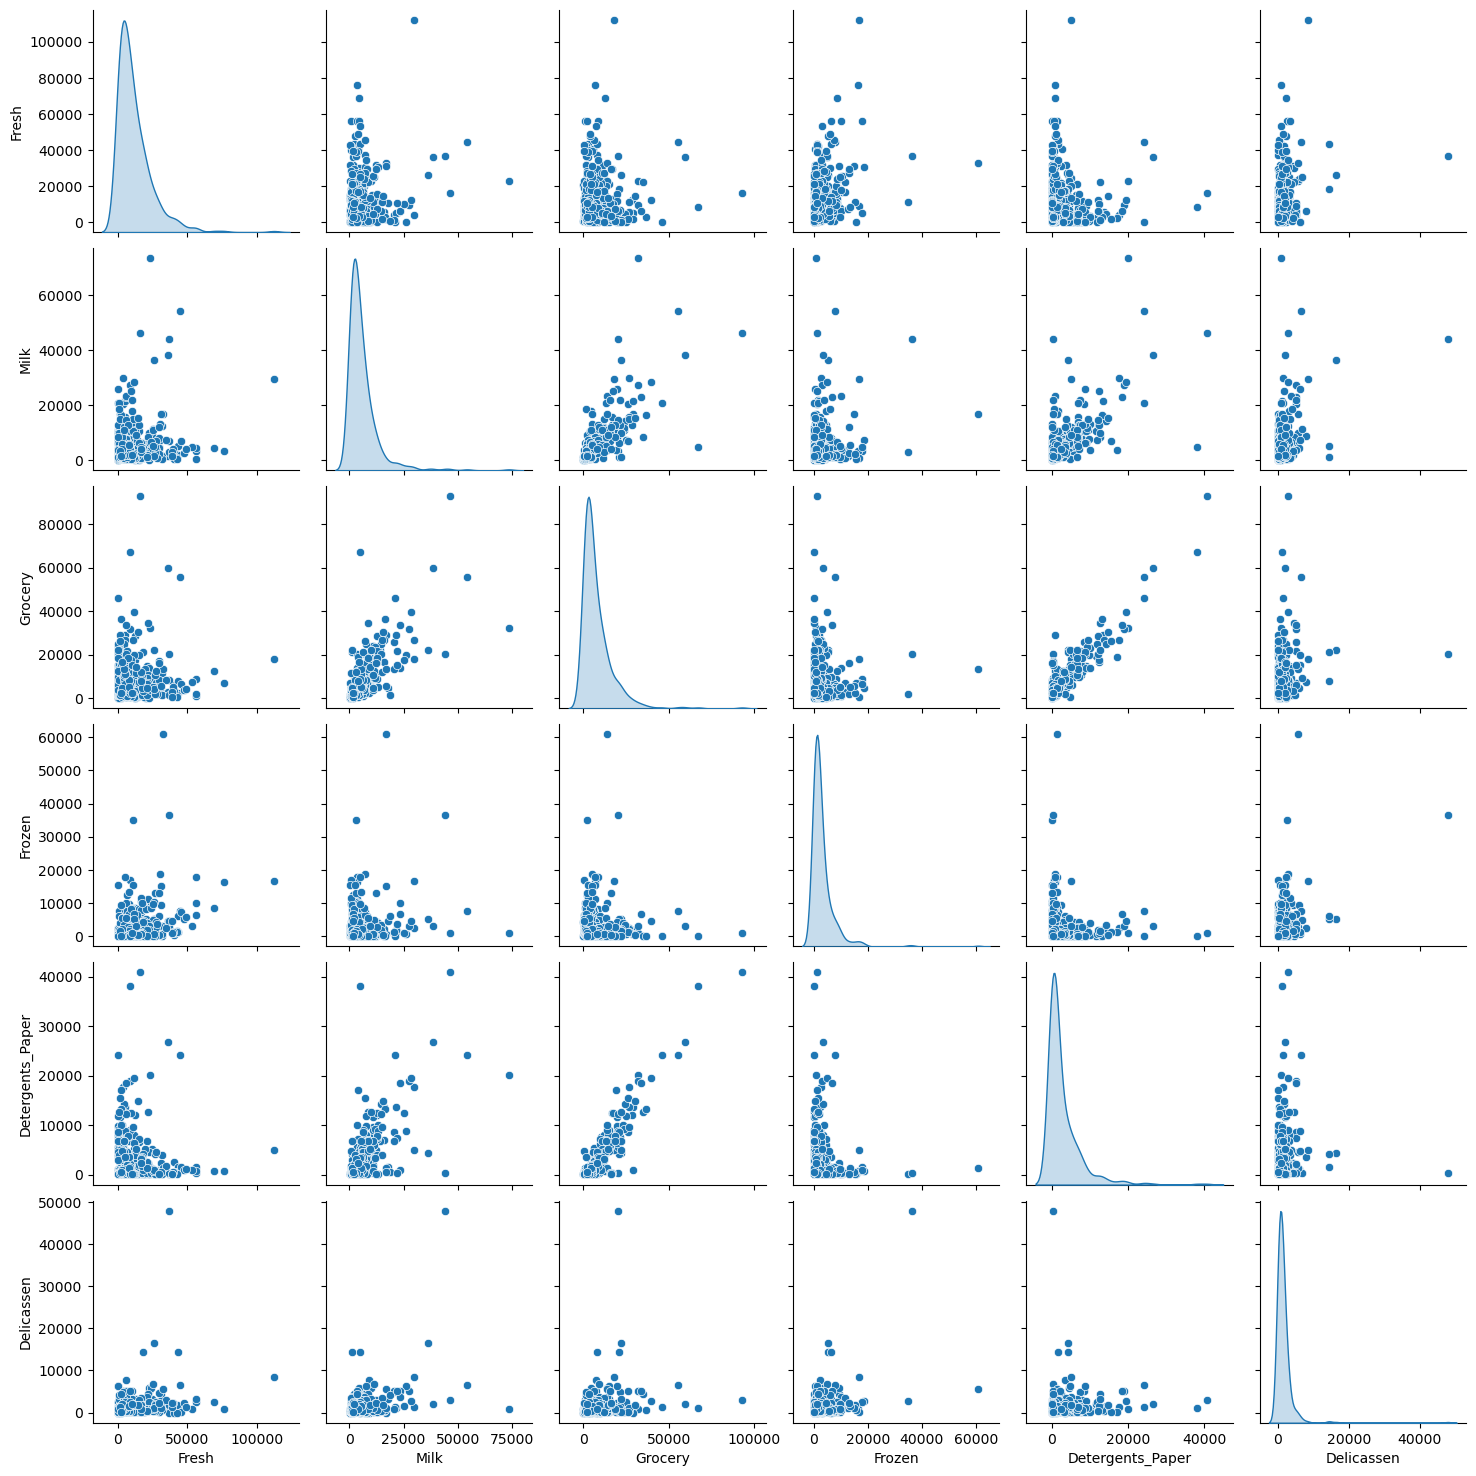

In [30]:
sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.show()
# visualizing the data.

In [31]:
#creating a function that identifies the outliers


def identify_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lower_quantile=q1-IQR*1.5
    upper_quantile=q3+IQR*1.5
    outliers=[]
    for value in df[column]:
        if( value> upper_quantile) or (value<lower_quantile):
            outliers.append(value)
    print(' column : ', column)    
    print('upper_quantile is ',upper_quantile,' lower_bound is ',  lower_quantile)
    print('outliers : ',outliers)

In [32]:
identify_outliers(df,'Fresh')
print("\n")
identify_outliers(df,'Milk')
print("\n")
identify_outliers(df,'Grocery')
print("\n")
identify_outliers(df,'Frozen')
print("\n")
identify_outliers(df,'Detergents_Paper')
print("\n")
identify_outliers(df,'Delicassen')
print("\n")

 column :  Fresh
upper_quantile is  37642.75  lower_bound is  -17581.25
outliers :  [43088, 56159, 44466, 40721, 43265, 56082, 76237, 42312, 45640, 112151, 47493, 56083, 53205, 49063, 68951, 40254, 42786, 39679, 38793, 39228]


 column :  Milk
upper_quantile is  15676.125  lower_bound is  -6952.875
outliers :  [36423, 20484, 15729, 22044, 54259, 21412, 29892, 38369, 20959, 46197, 73498, 27472, 16729, 15726, 25862, 29627, 43950, 28326, 16599, 23133, 17972, 23527, 20655, 25071, 16784, 18664, 21858, 16687]


 column :  Grocery
upper_quantile is  23409.875  lower_bound is  -10601.125
outliers :  [25957, 23998, 55571, 28921, 26866, 59598, 45828, 28540, 92780, 32114, 32034, 28986, 34792, 26870, 24708, 23596, 39694, 36486, 33586, 24773, 26839, 67298, 26316, 30243]


 column :  Frozen
upper_quantile is  7772.25  lower_bound is  -3475.75
outliers :  [9408, 10002, 9510, 7782, 10643, 8872, 8132, 9735, 8693, 35009, 18028, 8853, 16538, 8195, 8425, 16745, 36534, 7888, 18711, 8321, 11422, 10155, 1691

In [33]:
# creating a function that removes outliers


def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    for i in df.index:
        value=df.loc[i,column]
        if(value>upper_bound):
            df.loc[i,column]=upper_bound
        elif(value<lower_bound):
            df.loc[i,column]=lower_bound
    print('Removed')

In [34]:
remove_outliers(df,'Fresh')
remove_outliers(df,'Milk')
remove_outliers(df,'Grocery')
remove_outliers(df,'Frozen')
remove_outliers(df,'Detergents_Paper')
remove_outliers(df,'Delicassen')

Removed
Removed
Removed
Removed
Removed
Removed


C:\Users\johnk\AppData\Local\Temp\ipykernel_58184\3995930147.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37642.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,column]=upper_bound
C:\Users\johnk\AppData\Local\Temp\ipykernel_58184\3995930147.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15676.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,column]=upper_bound
C:\Users\johnk\AppData\Local\Temp\ipykernel_58184\3995930147.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23409.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,column]=upper_bound
C:\Users\johnk\AppData\

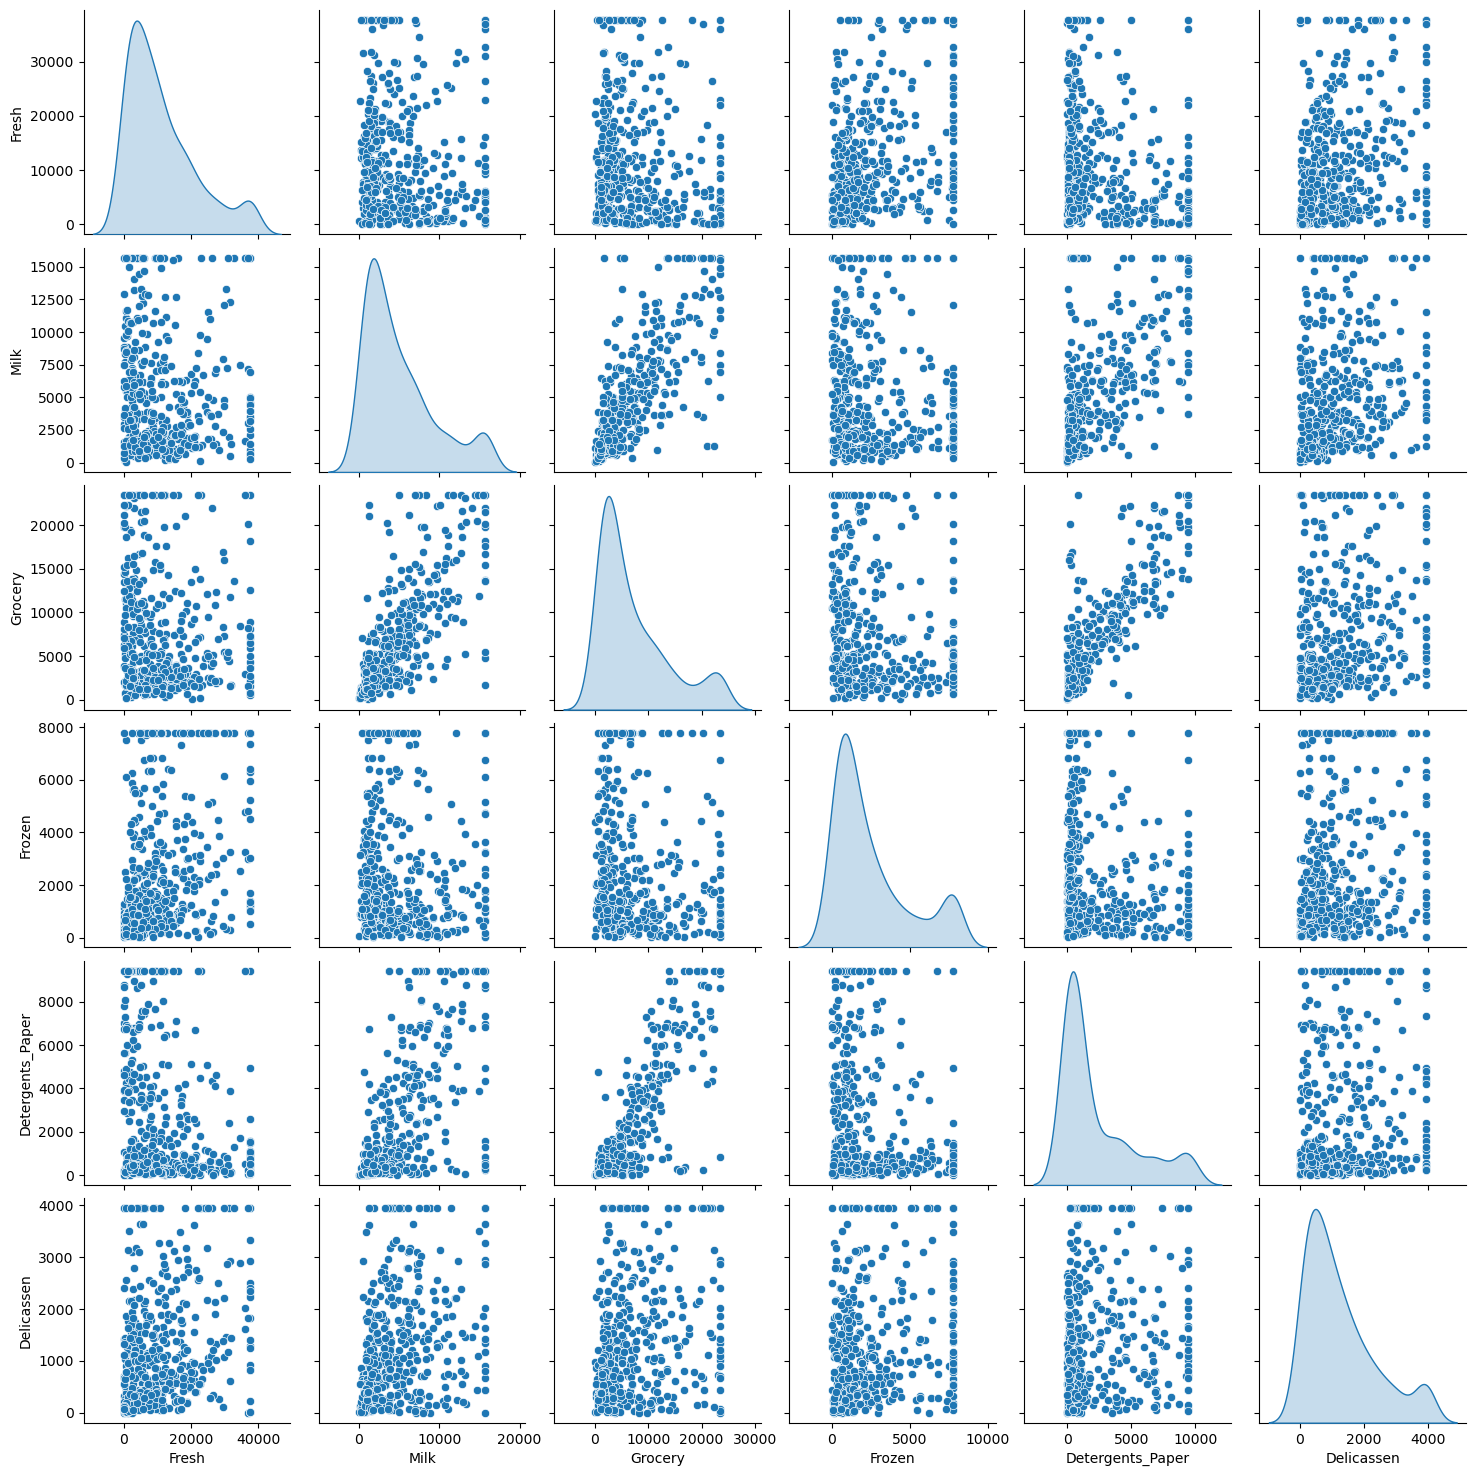

In [35]:
# visualising the data after removing outliers
sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.show()

In [36]:
df.to_csv("clean_data.csv", index=False)


In [38]:
region_channel.to_csv("region_channel.csv",index= False)